In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time

In [2]:
def func_factory(x1,x2,y1,y2):
    return lambda x: ((y2-y1)/(x2-x1)) * (x - x1) + y1

In [3]:
def piecewise_func(breaks, func, x):
    if len(breaks)-1 != len(func):
        print("improper lengths of input breaks/funcs")
    for i in range(len(breaks)-1):
        if x >= breaks[i] and x <= breaks[i+1]:
#             print(breaks[i])
            return func[i](x)
    print("x value out of range ", x)

In [4]:
def value(x_list, y_list, x):
    if len(x_list) != len(y_list):
        print("improper lengths of inputs")
    for i in range(len(x_list)-1):
        if x >= x_list[i] and x <= x_list[i+1]:
#             print(x_list[i])
            y = ((y_list[i+1]-y_list[i])/(x_list[i+1] -x_list[i])) * (x - x_list[i]) + y_list[i]
            return y
    print("x value out of range ", x)

In [5]:
def lin_aprx_web_plot(x_0, r, n_points, nmax = 100, savepng = False):
    
    X = np.arange(0,1,.001)
    
    x_values = np.round(np.linspace(0, 1, n_points+2), 3)
    y_values = np.multiply(x_values, r) * np.subtract(1, x_values)
    
#   print(x_values, y_values)

    fig = plt.figure(figsize=(10.5, 8))
    ax = fig.gca()
    
    plt.plot(X, r * X * (1 - X), c = '#AAAAAA') # curve
    plt.plot(x_values, y_values)  # linear approximation graph
    
#   func_list = []
#   for i in range(len(x_values)):
#       if not i+1 >= len(x_values):
#             func_list.append(func_factory(x_values[i],x_values[i+1],y_values[i],y_values[i+1]))
            
# #             slope = (y_values[i+1] - y_values[i]) / (x_values[i+1] - x_values[i])
# #             func_list.append(lambda x: slope * (x - x_values[i]) + y_values[i])
#             print("y = " + str((y_values[i+1]-y_values[i])/(x_values[i+1]-x_values[i])) + "(x -" + str(x_values[i]) + ") + " + str(y_values[i])) 
    
#     g = np.piecewise(X, 
#     [
#         (X <= x_values[6]),
#         (X <= x_values[5]),
#         (X <= x_values[4]),
#         (X <= x_values[3]),
#         (X <= x_values[2]),
#         (X <= x_values[1])
#     ],
#     func_list                
#     )
    
    x_plots = np.empty(nmax+1)
    y_plots = np.empty(nmax+1)
    
    x_plots[0] = x_0
    y_plots[0] = 0
    
    
    for n in range(1, nmax, 2):
        # Vertical Lines:
        # the x value is the same but the y value changes based on the function (curve)
        x_plots[n] = x_plots[n-1]
        y_plots[n] = value(x_values, y_values, x_plots[n])
#         print(x_plots[n],y_plots[n])
        
        # Horizontal Lines
        # the y value is the same but the the new x value = y value as the diagonal line is y = x
        x_plots[n+1] = y_plots[n]
        y_plots[n+1] = y_plots[n]
    
    plt.plot(x_plots, y_plots, c = 'r') 
    plt.plot(X, X, c = 'black', linestyle=":") # line y = x

    maxy = 1.0
    
    line = [[-0.01, maxy+0.1], [-0.01, maxy+0.1]] #line for y = x on the plt
    xaxes = [0, 0,             -0.06, 1.01] #line for the x axis
    yaxes = [-0.06, maxy+0.01, 0, 0] #line for the y axis
    #plt.grid(True)
    xs = np.arange(-0.1, 1.1, 0.05) #  list of xticks 
    ys = np.arange(0,maxy+0.1, 0.05) # list of yticks
    xticks = [] #this is for the labels on the xticks
    
    # setting up the list of strings for the xtick labels
    for i in range(len(xs)):
        if i%2 == 1:
            xticks.append("")
        else:
            xticks.append(str(np.floor(100*xs[i])/100))
            
    
    ax.set_xticks(xs) # set the x ticks (on the axis)
    ax.set_yticks(ys) # set the y ticks (on the axis)
    ax.set_xticklabels(xticks) #set the labels on the xticks
    # plt.locator_params(axis='x', nbins=12)
    plt.grid(True)  #draw the grid
    
    plt.plot(xaxes[0:2], yaxes[0:2], c="k")   # x axis in black
    plt.plot(xaxes[2:4], yaxes[2:4], c="k")   # y axis in black
    
    
    plt.suptitle("Linear Approximation")
    plt.title("r = " + str(r) + " n = " + str(n) + " x = " + str(x_plots[-1]) + " # of points = " + str(n_points))
    if savepng:
        plt.savefig("aprx web r = " + str(r) + " n = " + str(n) + " # of points = " + str(n_points) + ".png")
    
    plt.show()

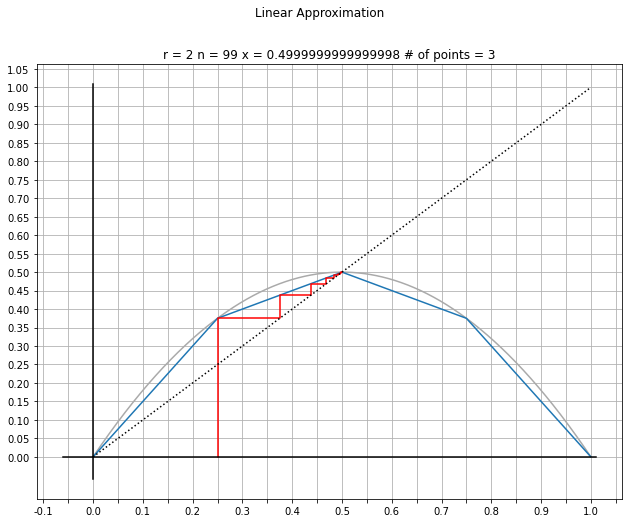

In [6]:
lin_aprx_web_plot(.25, 2, 501, savepng=True)

In [7]:
def create_func_list(x_values, r_value):

    y_values = np.multiply(x_values, r_value) * np.subtract(1, x_values)
    func_list = []
    for i in range(len(x_values)):
        if i+1 < len(x_values):
            func_list.append(func_factory(x_values[i],x_values[i+1],y_values[i],y_values[i+1]))  
    return func_list

In [8]:
def vector_func(x_values, r_values):
    return [create_func_list(x_values,r) for r in r_values]

In [9]:
def value2(func_list, x, r_value):
    x = max(min(x,1),0)
    idx = -1
    try:
        idx = min(int(x * len(func_list)), len(func_list)-1)
        return max(min(func_list[idx](x),1),0)
    except:
        print(f"idx={idx}  x={x}   r={r_value}")
        return 0

In [16]:
def lin_aprx_bif_plot(x_0, n_points, n = 100, savepng = False):
    
    r_values = np.arange(3.6, 3.8, .0001) #.0001)
    x_init = 0.25

    x_values = np.round(np.linspace(0, 1, n_points+2), 3)
    print(f" num x's = {len(x_values)}")

    fig = plt.figure(figsize = (11,8.5), tight_layout=True)
    fig.patch.set_facecolor('white')

    #x = x_0
    bf_r = []
    bf_x = []

    #with np.nditer([func_lists, x_init, r], flags=["refs_ok"], op_flags=[['readonly'],['readwrite'],['readonly']]) as it:
    for rs in r_values:
        x = x_init
        func_list = create_func_list(x_values, rs)
        for j in range(700):
            x = value2(func_list, x, rs)
        for j in range(n):
            bf_x.append(x)
            bf_r.append(rs)
            x = value2(func_list, x, rs)
    """
    for idx, x in enumerate(r):
        for j in range(700):
            x_init[idx] = value2(func_lists[idx], x_init[idx], r[idx])
        for j in range(n):
            bf_x.append(x_init[idx])
            bf_r.append(r[idx])
            x_init[idx] = value2(func_lists[idx],  x_init[idx], r[idx])
    
    for i in range(len(r)):
        x = x_0
        
        for j in range(700):
            x_init[i] = value2(func_lists[i], x_init[i], r[i])
            
        for j in range(n):
            bf_x.append(x_init[i])
            bf_r.append(r[i])
            x_init[i] = value2(func_lists[i], x_init[i], r[i])
    """

    print(f"len of bf_x = {len(bf_x)} and len of bf_r = {len(bf_r)}")
        
    plt.scatter(bf_r,bf_x,s =.0001, c= 'black')
    
    # set y and x ticks
    # plt.xticks(np.linspace(1,4,11))
    plt.grid()

    plt.xlabel('r')
    plt.ylabel('x')
    
    plt.suptitle("Linear Approximation")
    plt.title("$x_0$ =" + str(x_0) + " n=" + str(n) + " # of points = " + str(n_points))
    
    if(savepng):
        fig.savefig("lin_aprx_bif_x_0=" + str(x_0) + "_#ofpoints=" + str(n_points)  + ".png", bbox_inches='tight')
    
    plt.show()

 num x's = 103
len of bf_x = 1000000 and len of bf_r = 1000000


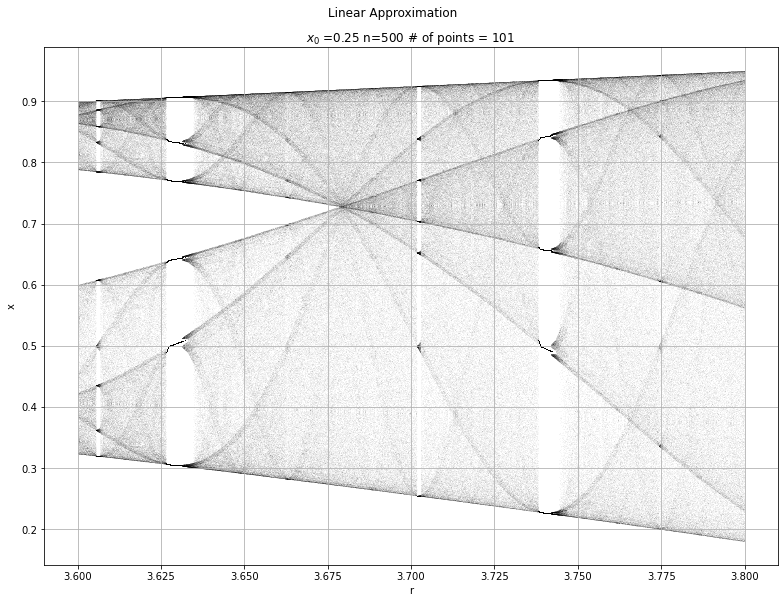

Time taken: 15.730304600000181 seconds


In [20]:
#def lin_aprx_web_plot(x_0, r, n_points, nmax = 100):
#lin_aprx_web_plot(.25, 3.8, 51)
#def lin_aprx_bif_plot(x_0, n_points, n = 100, savepng = False):

t1 = time.perf_counter()
lin_aprx_bif_plot(.25, n_points= 101, n = 500, savepng = True)
t2 = time.perf_counter()
print(f"Time taken: {t2-t1} seconds")

In [ ]:
#find error in the linear approximation
# def get_error(n_points, x_0 = .25):